<font size=3 color='blue'>
    
# <center> Tarea 1,  fecha de entrega: febrero 17 del 2023 </center> 

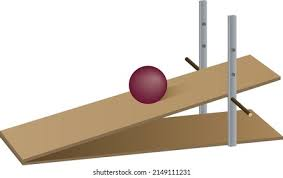

<font size=4>En esta tarea vamos a realizar el ajuste de parámetros para describir la naturaleza del plano inclinado, el cual, como físicos, sabemos que es un problema de **Movimiento Uniformemente Acelerado**. Dado un conjunto de muestras experimentales, pondrás a prueba  tu "intuición física", para determinar los valores apropiados de los pesos y el bias, para obtener el mínimo error posible dada una función F(X,$\vec{W}$, b) que propongas para describir el problema.

In [120]:
import numpy as np
import matplotlib.pyplot as plt

## Definición de función para obtener los datos experimentales

In [121]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):
    
    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero) 
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance
      
    """
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2/2 + error 
        
    return x, y

## Declaración de parámetros de entrada para describir el sistema

In [122]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100.0
measure_time = 100.0
speed = 20.0
acelera= 100.0
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


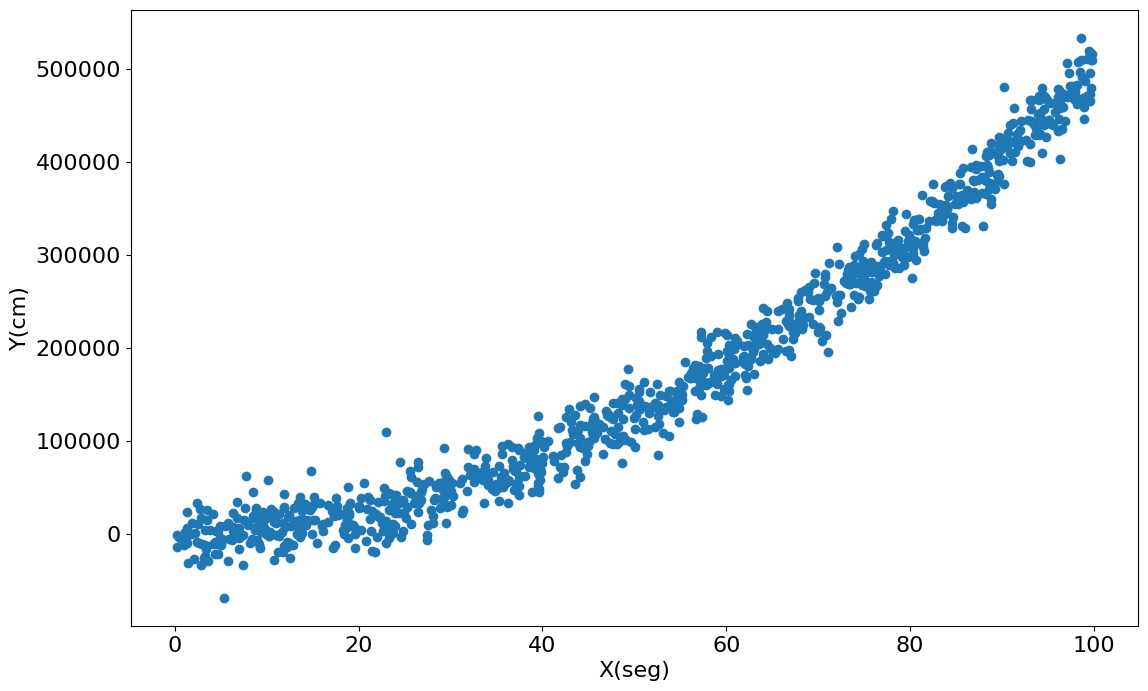

In [123]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=5 color='blue'>

Proponemos una función o mapeo que nos permita correlacionar los tiempos (X) con la distancia medida (Y)

$$
    F(x, W_0, W_1, b)=W_1x^2+W_0x+b
$$

<font size=4 color=red>Pregunta 1: Inicializa los valores para $W_1, W_0$ y $b$, de la manera en que tú mejor consideres. Recuerda que esto es un "guess" inicial.

In [124]:
#Initializing the parameter defining the function F

weight1_0 = 40.0
weight0_0 = 10.0
weight_0 = [weight0_0, weight1_0]

bias_0 = 0.0

<font size=4 color="blue">

Se grafica la correspondiente función $F(X,W,b)$, junto con los puntos que representan a las muestras

In [125]:
# Function for plotting (x,y) and (x,F(X,W,b))

def plot_x_y_y__(x, y, y_):
    
    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y(cm)', fontsize=16)
    plt.xlabel('X(seg)', fontsize=16)

    #Plotting function
    plt.scatter(x, y_, color='green', lw=1, label='F(X, W, b)')
    plt.legend()

    #Plotting samples
    plt.scatter(x, y)

    plt.show()

<font size=4 color=red>Pregunta 2: Utilizando la función señalada en la celda anterior, construye el arreglo de valores *y_*, los cuales representan los valores de tu función F(X,W,b). Luego, calcula el error cuadrático medio de dicho arreglo con los valores del experimento, *y*. Imprime el resultado y la gráfica

Mean Squared Error: 2539193624.689337


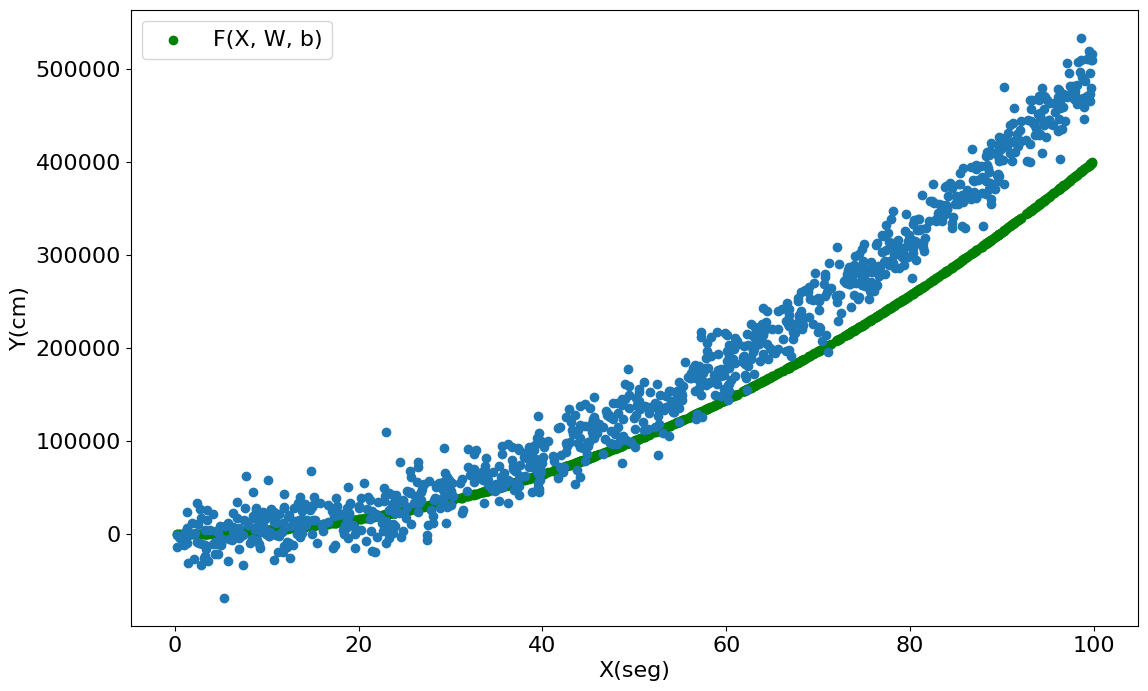

In [126]:
def F(X, W, b):
    '''
    Funcion modelo propuesta para estimar y a partir de x.
    Input
        X (float/array)   : valores de entrada (tiempo)
        W (array)         : arreglo de pesos [w0, w1]
        b (float)         : bias
    Output
        F(X, W, b) = b + w0*X + w1*X^2 (estimacion de distancia)
    '''
    w0, w1 = W
    return b + w0*X + w1*X**2

y_ = F(x, weight_0, bias_0)

residuo = np.mean((y - y_)**2)
print(f'Mean Squared Error: {residuo}')
plot_x_y_y__(x, y, y_)

<font size=4 color=red>Pregunta 3: Define una función, que se llame **update_weights_biases**, la cual permita actualizar los parámetros $W_1, W_0$ y $b$, dando una delta $\Delta$ de cambio para cada uno de ellos. (HINT: Revisa la función que se definió en la clase 2. No la puedes copiar completamente; debes realizar ciertos ajutes a esa función para este nuevo problema)

In [127]:
def update_weights_biases(x, y, weight, bias, delta_weight, delta_bias):
    '''
    Update weights (w1, w0) and bias. Calculates:
    w1 = w1 + delta_w1, w0 = w0 + delta_w0, bias = bias + delta_bias
    Input
        x (float/array)         : valores de entrada (tiempo)
        y (float/array)         : datos de salida (distancia)
        weight (array)          : arreglo de pesos [w0, w1]
        bias (float)            : bias
        delta_weight (array)    : delta de cambio para los pesos
        delta_bias (float)      : delta de cambio para el bias
    Output
        _weight y _bias         : valores actualizados de pesos y bias
        y_                      : nuevas estimaciones de distancia
        mse                     : error cuadratico medio
    '''

    # No se reescriben los valores de weight ni bias
    # Se crean nuevas variables _weight y _bias
    _weight = []
    for i in range(len(weight)):
        _weight.append(weight[i] + delta_weight[i])
    _bias = bias + delta_bias

    y_ = F(x, _weight, _bias)
    mse = np.mean((y - y_)**2)
    return _weight, _bias, y_, mse

<font size=4 color=red>Pregunta 4: Realiza una gráfica, actualizando los valores de los pesos y los bias, con el delta de cambio que tú consideres, para los 3 parámetros involucrados. Utiliza la función *plot_x_y_y__* para mostrar el resultado

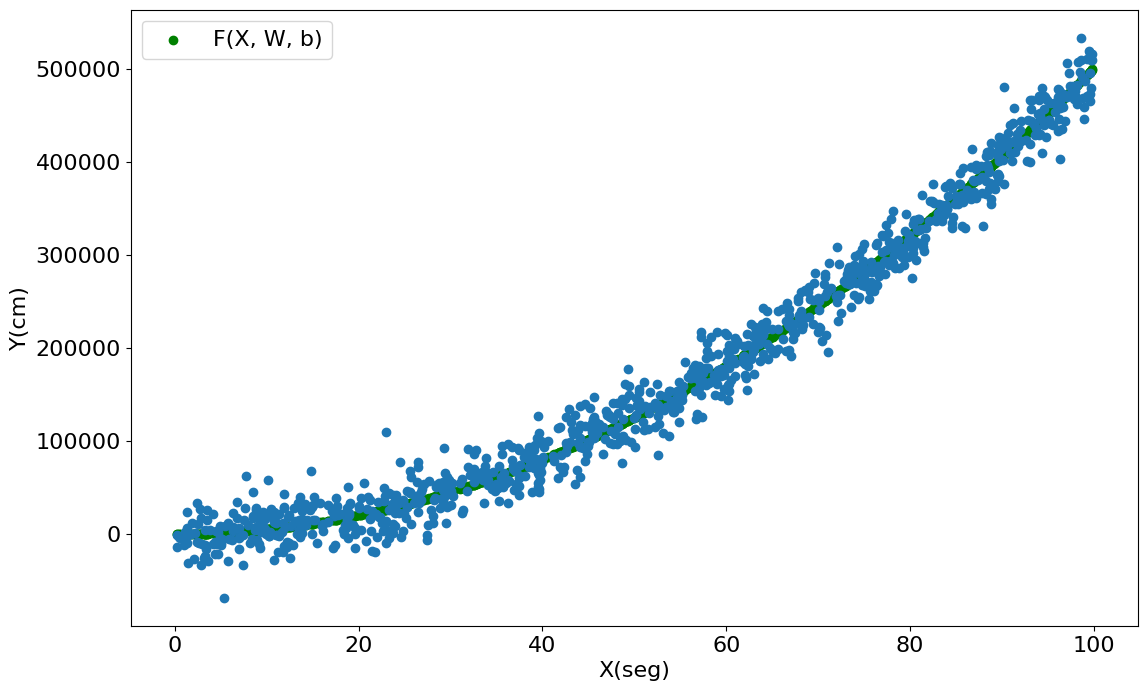

In [128]:
weight = weight_0
bias = bias_0
delta_w = [1.0, 10.0]
delta_b = -1.0

weight, bias, y_, mse = update_weights_biases(x, y , weight, bias, delta_w, delta_b)
plot_x_y_y__(x, y, y_)

<font size=4 color=red>Pregunta 5: Construye un ciclo *for*, el cual realizará 120 veces la actualización de los parámetros de tu función F(X,W,b). Comienza con la actualización del parámetros $W_1$; define un cambio para este parámetro mencionado, y deja en 0 las deltas de los demás. Imprime el resultado de los pesos, el bias y el error MSE para cada 10 iteraciones. Los resultados de tus actualizaciones los debes guardar en una variable, que se va a llamar **update_outputs**, la cual será una lista, cuyos elementos también serán listas, que contienen a su vez, en el orden indicado, $W_1$, $W_0$, bias, **y_** y el error MSE

In [129]:
# only modifies w1
update_outputs = []

weight = weight_0
bias = bias_0
delta_w = [0.0, 0.2]
delta_b = 0.0

iterations = 120

for i in range(iterations):
    
    weight, bias, y_, mse = update_weights_biases(x, y, weight, bias, delta_w, delta_b)
    update_outputs.append([weight, bias, y_, mse])
    
    if i % 10 == 0 :
            print('w1: {0:8.2f}    w0: {1:8.2f}    bias: {2:8.2f}   MSE: {3:10.2f}'.format(weight[1],weight[0],bias, mse))

w1:    40.20    w0:    10.00    bias:  0.00   MSE: 2453450159.52
w1:    42.20    w0:    10.00    bias:  0.00   MSE: 1691199287.94
w1:    44.20    w0:    10.00    bias:  0.00   MSE: 1102009834.68
w1:    46.20    w0:    10.00    bias:  0.00   MSE: 685881799.75
w1:    48.20    w0:    10.00    bias:  0.00   MSE: 442815183.13
w1:    50.20    w0:    10.00    bias:  0.00   MSE: 372809984.83
w1:    52.20    w0:    10.00    bias:  0.00   MSE: 475866204.85
w1:    54.20    w0:    10.00    bias:  0.00   MSE: 751983843.19
w1:    56.20    w0:    10.00    bias:  0.00   MSE: 1201162899.85
w1:    58.20    w0:    10.00    bias:  0.00   MSE: 1823403374.83
w1:    60.20    w0:    10.00    bias:  0.00   MSE: 2618705268.14
w1:    62.20    w0:    10.00    bias:  0.00   MSE: 3587068579.76


<font size=4 color=red>Pregunta 6: Realiza las gráficas para algunos de los parámetros que actualizaste y guardaste en la lista **update_outputs**. Puedes realizar el mismo ciclo *for* que señalamos en la notebook de la clase 2

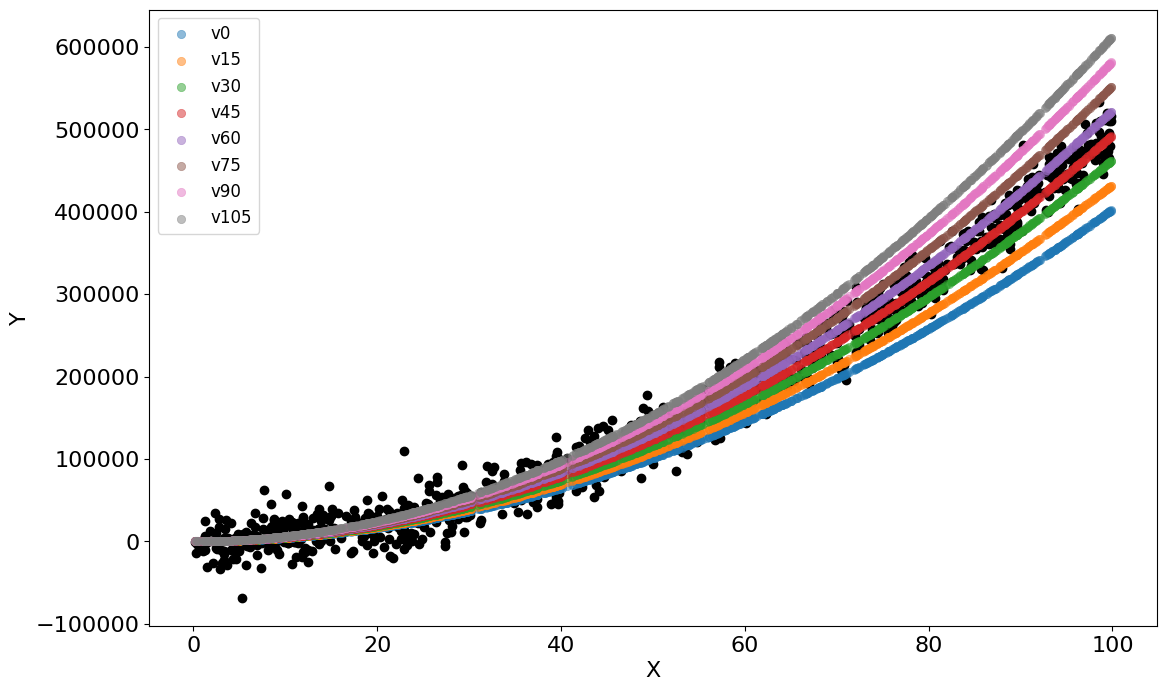

In [130]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y, c='k', marker='s')
for i in range(0,120,15):
    guess = update_outputs[i][2]
    plt.scatter(x, guess, label='v' + str(i), lw=0.5, alpha=0.5)
    plt.legend()
plt.show()

<font size=4 color=red> Pregunta 7: Realiza la gráfica de $W_1$ vs MSE. (HINT: Declara una lista vacía en la que guardes los pesos W1, y otra donde guardes los errores MSE. Estas listas las vas a ir llenando con los valores que guardaste en **update_outputs**. Revisa la clase 2 para que veas cómo se realiza este proceso. Ten cuidado con los índices)

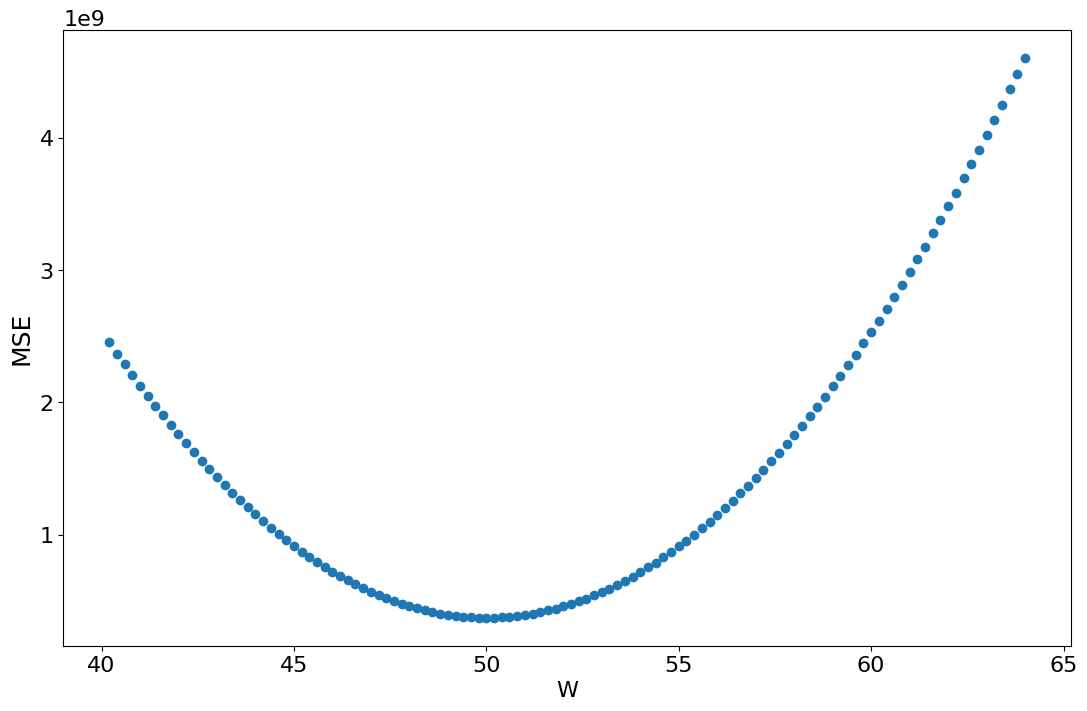

In [131]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W', fontsize=16)

weights1 = []

mse = []

for update_output in update_outputs:
    weights1.append(update_output[0][1])        # update_output[0] es una lista de pesos
    mse.append(update_output[3])
    
plt.scatter(weights1, mse)
plt.show()

<font size=4 color=red> Pregunta 8: Señala el error más bajo obtenido, así como los mejores parámetros que llevan a este resultado del error mínimo

In [132]:
index_min = np.argmin(mse)

print('El MSE minimo tiene el valor: {0:10.2f}'.format(update_outputs[index_min][3]))

w0_opt = update_outputs[index_min][0][0]
w1_opt = update_outputs[index_min][0][1]
b_opt = update_outputs[index_min][1]

print('Los valores optimos de los parámetros son w1 = {0:5.2f}, w0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 372022740.83
Los valores optimos de los parámetros son w1 = 50.00, w0 = 10.00 y b =  0.00 


<font size=4 color=red>Pregunta 9: Realiza los mismos procedimientos que desarrollaste en las preguntas 5 a la 8, pero ahora actualizando el valor $W_0$

In [133]:
# only modifies w1
update_outputs = []

weight = [w0_opt, w1_opt]
bias = b_opt
delta_w = [0.1, 0.0]
delta_b = 0.0

iterations = 120

for i in range(iterations):
    
    weight, bias, y_, mse = update_weights_biases(x, y, weight, bias, delta_w, delta_b)
    update_outputs.append([weight, bias, y_, mse])
    
    if i % 10 == 0 :
            print('w1: {0:8.2f}    w0: {1:8.2f}    bias: {2:8.2f}   MSE: {3:10.2f}'.format(weight[1],weight[0],bias, mse))

w1:    50.00    w0:    10.10    bias:  0.00   MSE: 372018015.82
w1:    50.00    w0:    11.10    bias:  0.00   MSE: 371974653.58
w1:    50.00    w0:    12.10    bias:  0.00   MSE: 371938360.26
w1:    50.00    w0:    13.10    bias:  0.00   MSE: 371909135.87
w1:    50.00    w0:    14.10    bias:  0.00   MSE: 371886980.41
w1:    50.00    w0:    15.10    bias:  0.00   MSE: 371871893.86
w1:    50.00    w0:    16.10    bias:  0.00   MSE: 371863876.24
w1:    50.00    w0:    17.10    bias:  0.00   MSE: 371862927.54
w1:    50.00    w0:    18.10    bias:  0.00   MSE: 371869047.77
w1:    50.00    w0:    19.10    bias:  0.00   MSE: 371882236.92
w1:    50.00    w0:    20.10    bias:  0.00   MSE: 371902495.00
w1:    50.00    w0:    21.10    bias:  0.00   MSE: 371929821.99


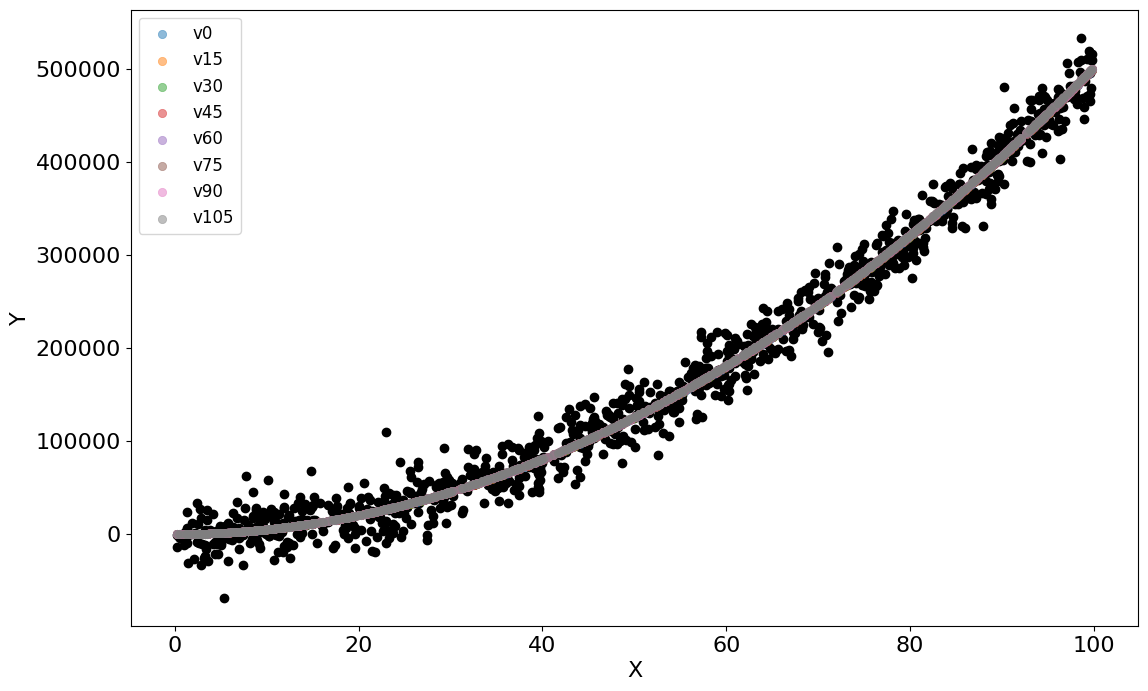

In [134]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y, c='k', marker='s')
for i in range(0,120,15):
    guess = update_outputs[i][2]
    plt.scatter(x, guess, label='v' + str(i), lw=0.5, alpha=0.5)
    plt.legend()
plt.show()

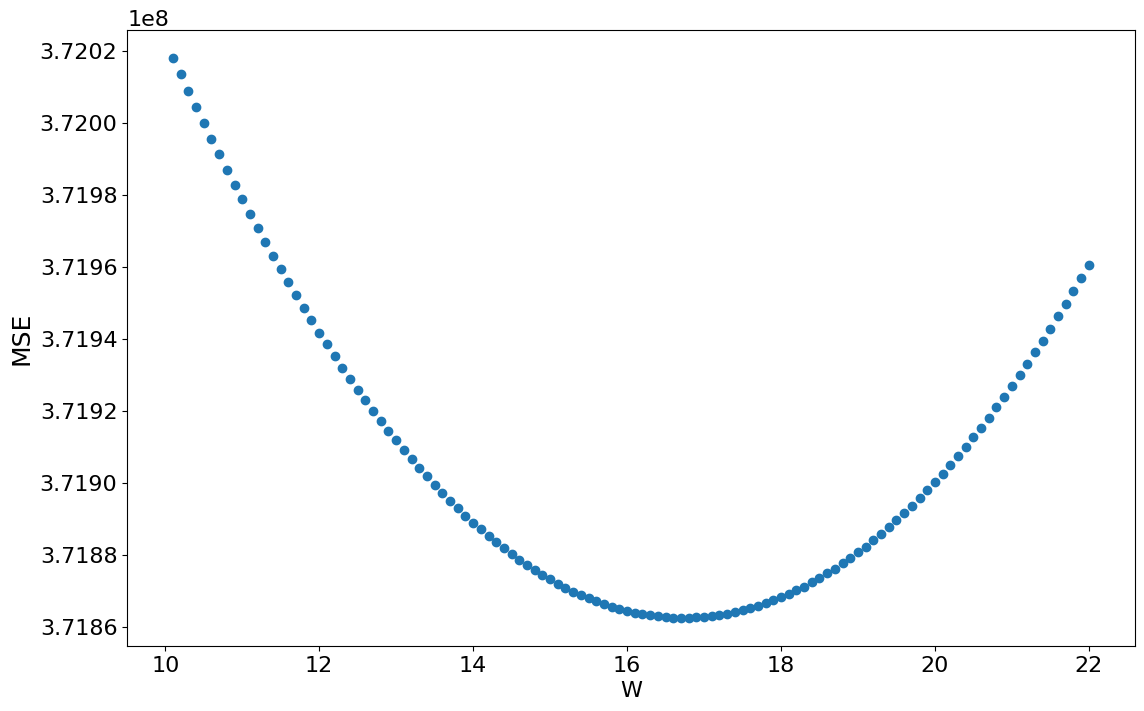

In [135]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W', fontsize=16)

weights0 = []

mse = []

for update_output in update_outputs:
    weights0.append(update_output[0][0])
    mse.append(update_output[3])
    
plt.scatter(weights0, mse)
plt.show()

In [136]:
index_min = np.argmin(mse)

print('El MSE minimo tiene el valor: {0:10.2f}'.format(update_outputs[index_min][3]))

w1_opt = update_outputs[index_min][0][1]
w0_opt = update_outputs[index_min][0][0]
b_opt = update_outputs[index_min][1]

print('Los valores optimos de los parámetros son w1 = {0:5.2f}, w0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 371862458.75
Los valores optimos de los parámetros son w1 = 50.00, w0 = 16.70 y b =  0.00 


<font size=4 color=red> Pregunta 10: Repite los pasos marcados en la pregunta 9, pero ahora para actualiza el valor de bias

In [137]:
# only modifies w1
update_outputs = []

weight = [w1_opt, w0_opt]
bias = b_opt
delta_w = [0.0, 0.0]
delta_b = 10.0

iterations = 120

for i in range(iterations):
    
    weight, bias, y_, mse = update_weights_biases(x, y, weight, bias, delta_w, delta_b)
    update_outputs.append([weight, bias, y_, mse])
    
    if i % 10 == 0 :
            print('w1: {0:8.2f}    w0: {1:8.2f}    bias: {2:8.2f}   MSE: {3:10.2f}'.format(weight[1],weight[0],bias, mse))

w1:    50.00    w0:    16.70    bias: 10.00   MSE: 371853506.15
w1:    50.00    w0:    16.70    bias: 110.00   MSE: 371774980.10
w1:    50.00    w0:    16.70    bias: 210.00   MSE: 371716454.05
w1:    50.00    w0:    16.70    bias: 310.00   MSE: 371677928.00
w1:    50.00    w0:    16.70    bias: 410.00   MSE: 371659401.95
w1:    50.00    w0:    16.70    bias: 510.00   MSE: 371660875.90
w1:    50.00    w0:    16.70    bias: 610.00   MSE: 371682349.85
w1:    50.00    w0:    16.70    bias: 710.00   MSE: 371723823.80
w1:    50.00    w0:    16.70    bias: 810.00   MSE: 371785297.75
w1:    50.00    w0:    16.70    bias: 910.00   MSE: 371866771.70
w1:    50.00    w0:    16.70    bias: 1010.00   MSE: 371968245.65
w1:    50.00    w0:    16.70    bias: 1110.00   MSE: 372089719.60


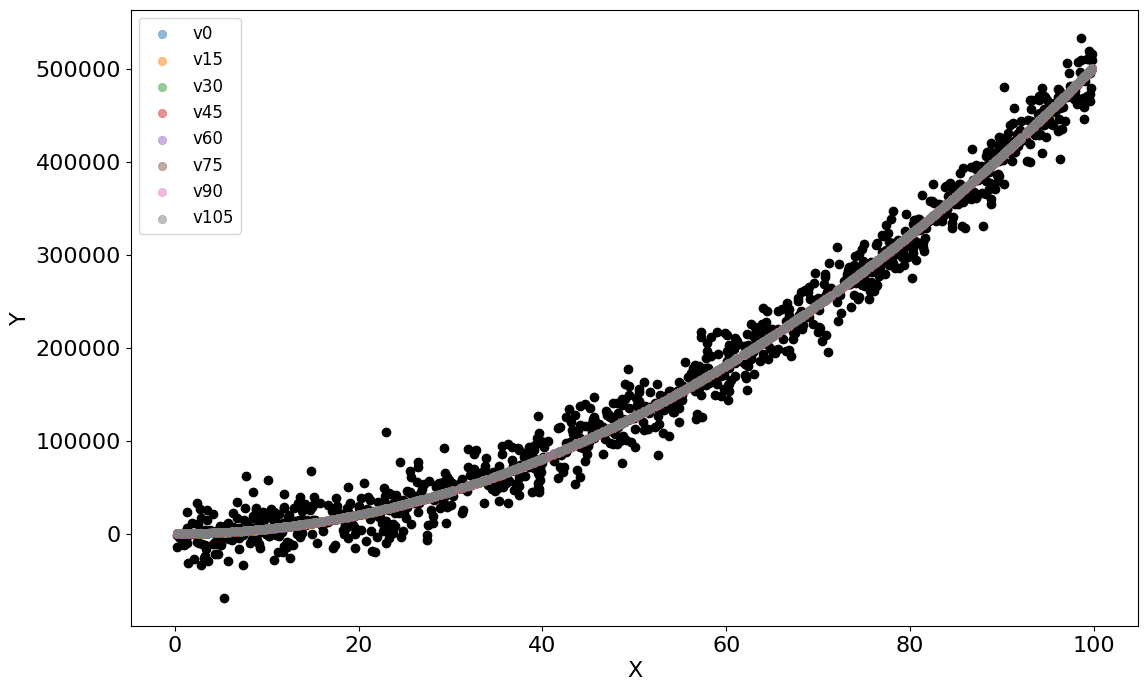

In [138]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y, c='k', marker='s')
for i in range(0,120,15):
    guess = update_outputs[i][2]
    plt.scatter(x, guess, label='v' + str(i), lw=0.5, alpha=0.5)
    plt.legend()
plt.show()

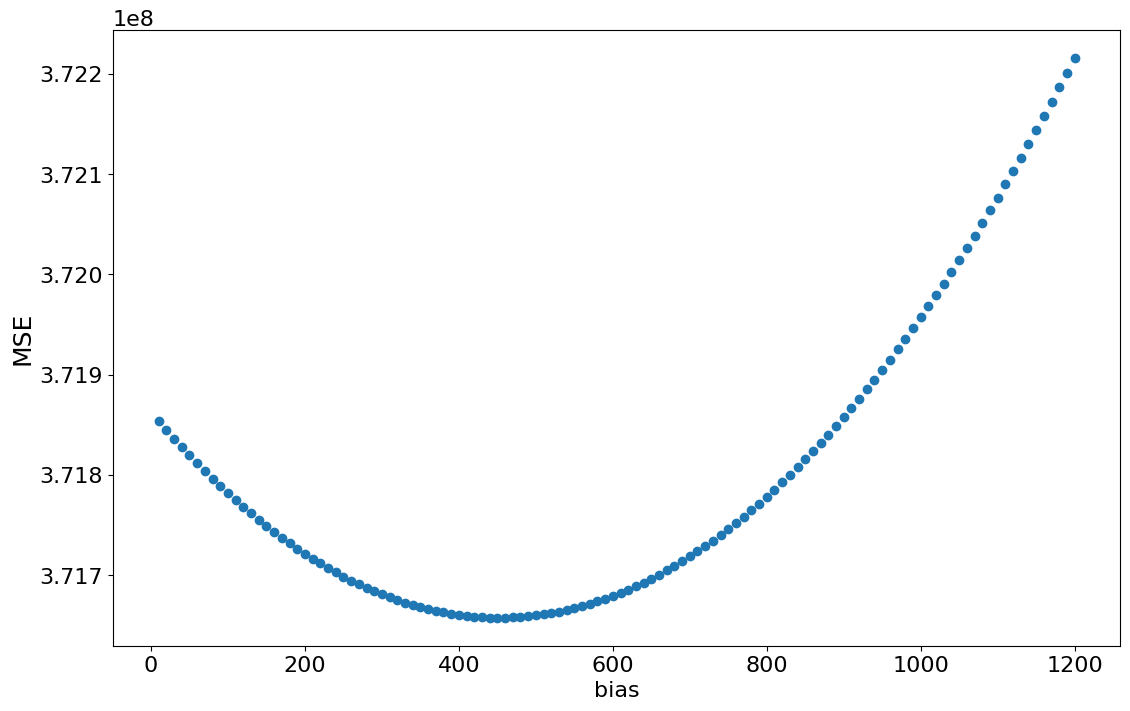

In [139]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('bias', fontsize=16)

bias = []

mse = []

for update_output in update_outputs:
    bias.append(update_output[1])
    mse.append(update_output[3])
    
plt.scatter(bias, mse)
plt.show()

In [140]:
index_min = np.argmin(mse)

print('El MSE minimo tiene el valor: {0:10.2f}'.format(update_outputs[index_min][3]))

w1_opt = update_outputs[index_min][0][1]
w0_opt = update_outputs[index_min][0][0]
b_opt = update_outputs[index_min][1]

print('Los valores optimos de los parámetros son w1 = {0:5.2f}, w0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 371657591.53
Los valores optimos de los parámetros son w1 = 50.00, w0 = 16.70 y b = 450.00 


<font size=4 color=red>Pregunta Extra: ¿Qué representa físicamente el valor $W_1$? ¿El ajuste que realizaste se acerca al valor que se indica como referencia? ¿Por qué? 

W1 es la mitad de la aceleracion (fuerza por unidad de masa) que experimenta el movil que desliza. Tras la optimizacion de los parametros, podemos concluir que la aceleracion seria 2xw1_opt = 2x50.0 = 100.0.

Personalmente, esperaria que los valores optimos se acerquen a los empleados al generar los datos (w1 = 100.0/2 = 50.0, w0 = 20.0, bias = 100.0), sin embargo este solo es el caso para el coeficiente w1. Considero que esto se debe a la gran dispersion de las mediciones que se aprecia a simple vista en la primera grafica.